**LOGISTIC REGRESSION FOR LOAN APPROVAL**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score,classification_report

In [5]:
df  = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
print(f"Total rows: {df.shape[0]}\nTotal columns: {df.shape[1]}")

Total rows: 4269
Total columns: 13


In [7]:
print("Basic information about the dataset:")
df.info()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
me

In [8]:
print("Number of null values in each column:")
df.isnull().sum()

Number of null values in each column:


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
print("Statistical Information:")
df.describe()

Statistical Information:


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [10]:
# Removing irrelevant feature
df.drop("loan_id",axis=1,inplace=True)

In [11]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [12]:
# Catagorical columns
cat_columns  = []
for feature in df.columns:
    if df[feature].dtypes=='object':
        cat_columns.append(feature)

cat_columns        

[' education', ' self_employed', ' loan_status']

In [13]:
# Converting catagorical columns to numerical
le = LabelEncoder()
for feature in cat_columns:
    df[feature] = le.fit_transform(df[feature])

In [14]:
df[cat_columns]

,education,self_employed,loan_status
0,0,0,0
1,1,1,1
2,0,0,1
3,0,0,1
4,1,1,1
...,...,...,...
4264,0,1,1
4265,1,1,0
4266,1,0,1
4267,1,0,0


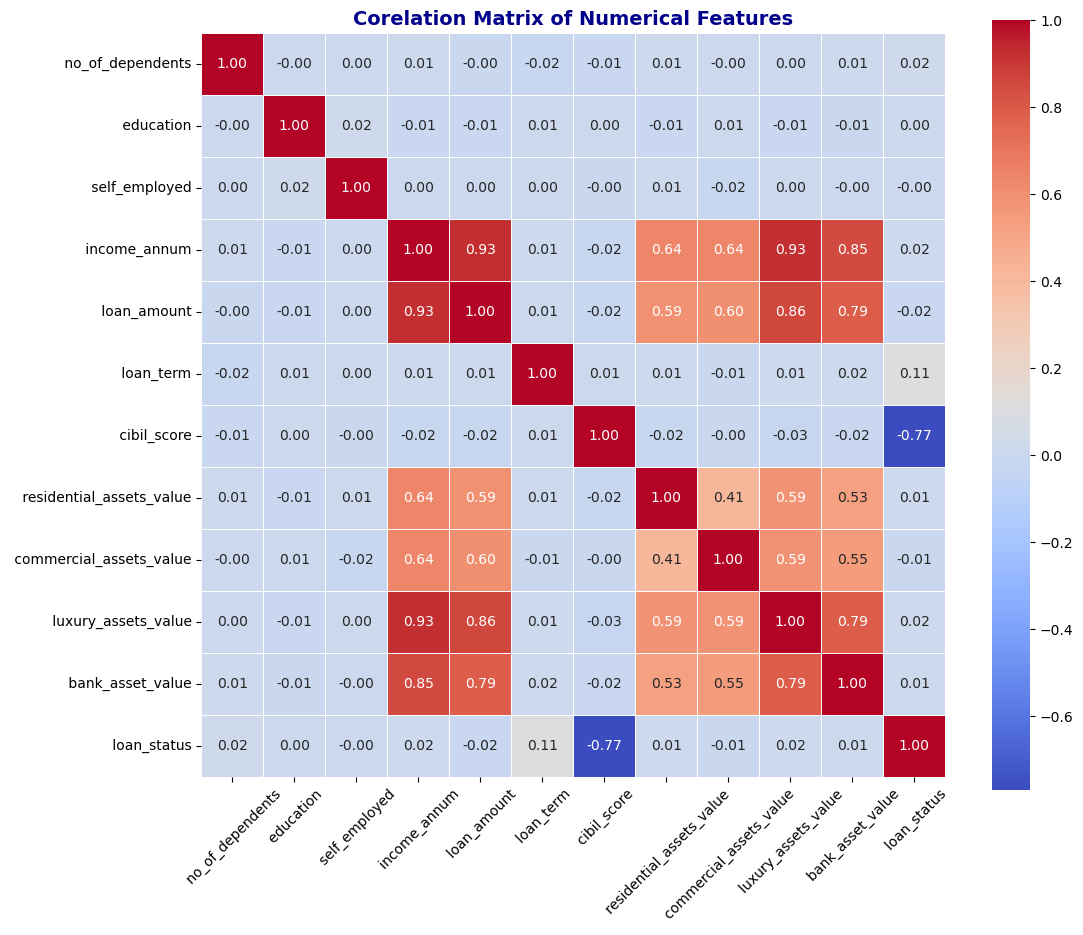

In [15]:
# Corelation matrix
numeric_features = df.select_dtypes(include='number')
plt.figure(figsize=(12,10))
sns.heatmap(
    numeric_features.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True
)
plt.title("Corelation Matrix of Numerical Features",
          fontweight='bold',
          fontsize =14,
          color = 'darkblue'
          )
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()   

In [16]:
print(df.columns.tolist())

[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [17]:
# Removing leading space
df.columns = df.columns.str.strip()

In [18]:
print(df.columns.tolist())

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [19]:
# Feature selection
X = df[['cibil_score', 'loan_term', 'income_annum', 'luxury_assets_value']]
y = df['loan_status']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
# Model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
clss_report = classification_report(y_test,y_pred)
confusion_matrixx = confusion_matrix(y_test,y_pred)
print(f"Accuracy: {accuracy}\nClassification report:{clss_report}\nConfusion matrix:{confusion_matrixx}")

Accuracy: 0.9086651053864169
Classification report:              precision    recall  f1-score   support

           0       0.93      0.93      0.93       536
           1       0.88      0.88      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854

Confusion matrix:[[497  39]
 [ 39 279]]


In [24]:
# Saving Model
import joblib
joblib.dump(model, 'loan_approval_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [25]:
# Doing prediction
pred_df = pd.read_csv("loan_prediction_input.csv")
pred_df

,cibil_score,loan_term,income_annum,luxury_assets_value
0,750,12,500000,20000
1,620,24,300000,10000
2,710,36,450000,15000
3,680,48,400000,13000
4,800,60,800000,50000
5,670,72,350000,12000
6,640,84,320000,11000
7,720,96,470000,17000
8,690,108,390000,14000
9,760,120,600000,30000


In [26]:
# Now apply the model
scaled_pred_df = scaler.transform(pred_df)
prediction = model.predict(scaled_pred_df)
print(prediction)

[0 0 0 1 1 1 1 1 1 1]


In [27]:
prediction = pd.DataFrame(prediction,columns=["Prediction"], index = pred_df.index)
prediction

,Prediction
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [28]:
pred_df["Prediction"] = np.where(prediction==1,"Approved","Rejected")
pred_df

,cibil_score,loan_term,income_annum,luxury_assets_value,Prediction
0,750,12,500000,20000,Rejected
1,620,24,300000,10000,Rejected
2,710,36,450000,15000,Rejected
3,680,48,400000,13000,Approved
4,800,60,800000,50000,Approved
5,670,72,350000,12000,Approved
6,640,84,320000,11000,Approved
7,720,96,470000,17000,Approved
8,690,108,390000,14000,Approved
9,760,120,600000,30000,Approved


In [29]:
pred_df.to_csv("loan_pre.csv",index=False)

In [30]:
from IPython.display import FileLink
FileLink("loan_pre.csv")

/Users/yasir/Desktop/Logistic Regression/loan_pre.csv